# Getting started progress report

- toc:false
- branch: master
- badges: true
- comments: false
- categories: [python]
- hide: true

This report provides statistics for class progress in the [Getting Started](https://nu-cem.github.io/CompPhys/) part of the Computational Physics course KD5081 at Northumbria University. 

## Automation

This notebook is hosted on Github and automatically runs after every commit, and once an hour. Automation is via a [Github action](https://github.com/NU-CEM/CompPhys/blob/master/.github/workflows/RunNotebook.yml). This workflow was designed following the clear advice given by the [Living with machines project](https://github.com/Living-with-machines/github_stats_report).

## Summary plot

An up-to-date summary plot of the data can also be found on [this page](https://nu-cem.github.io/CompPhys/2021/08/02/Issues.html).

## Prepare system
Install libraries, get Github authentication token and create tasks list.

In [1]:
from github import Github
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()
GH_TOKEN = os.getenv("GH_TOKEN")  # this is needed to interact with the Github API

In [3]:
# This is an ugly - I'm hardcoding the task list, so that it needs to be updated on the template and here.
# TODO: use the Pygithub API to parse the Github issue template.
tasks = ['Open and save a Jupyter Notebook', 
'Use basic Markdown in a notebook',
'Run Python cells in a notebook',
'Write a program that assigns scalar values to variables',
'Use valid and meaningful variable names',
'Perform calculations with the values',
'Correctly trace value changes in programs that use scalar assignment',
'Use the `print` function to print out values',
'Explain the difference between integer numbers and floating point numbers',
'Explain the difference between numbers and character strings',
'Find the type of a value using the `type` function',
'Manipulate strings using `*` and `+` operators',
'Select a single character from a string using indexing',
'Select a substring using slicing',
'Find the length of a string using the `len` function',
'Use built-in functions to convert between integer numbers, floating point numbers and strings',
'Expain the difference between built-in functions, library functions and custom-made functions',
'Explain the purpose of functions',
'Correctly nest calls to built-in functions',
'Use the `round` function to round a float to a given number of significant figures',
'Use help to display documentation for built-in functions',
'Describe situations in which SyntaxError and NameError occur',
'Give examples where programs need collections of values',
'Create a Python list',
'Explain the difference between \'indexing from one\' and \'indexing from zero\'',
'Select an item from a list using indexing',
'Assign new values to items in a list',
'Explain the difference between mutable and immutable types',
'Use the `append` method to add items to a list',
'Explain the difference between a method and a function',
'Use `del` to remove an item from a list',
'Use `#` to add in-line documentation to programs',
'Use docstrings to provide help documentation for custom functions',
'Use markdown to describe program behaviour and design decisions',
'Use assert statements for testing',
'Use `.__version__` to print library version numbers',
'Use consistent and appropriate whitespace']

## Retrieve and parse issue information

In [4]:
g = Github(GH_TOKEN)

In [5]:
repo = g.get_repo("nu-cem/CompPhys")
checklist_issues = repo.get_issues(labels=["python_checklist"])

In [6]:
totals = [0]*len(tasks)

for issue in checklist_issues:
    body = issue.body
    for i,task in enumerate(tasks):
        if task in body:
            splits = body.split(task,maxsplit=2)
            if splits[0][-4:-1] == '[x]':
                totals[i] += 1
        else:
            print("problem: '{}' not in string in issue # {}".format(task, issue.number))

## Plot results

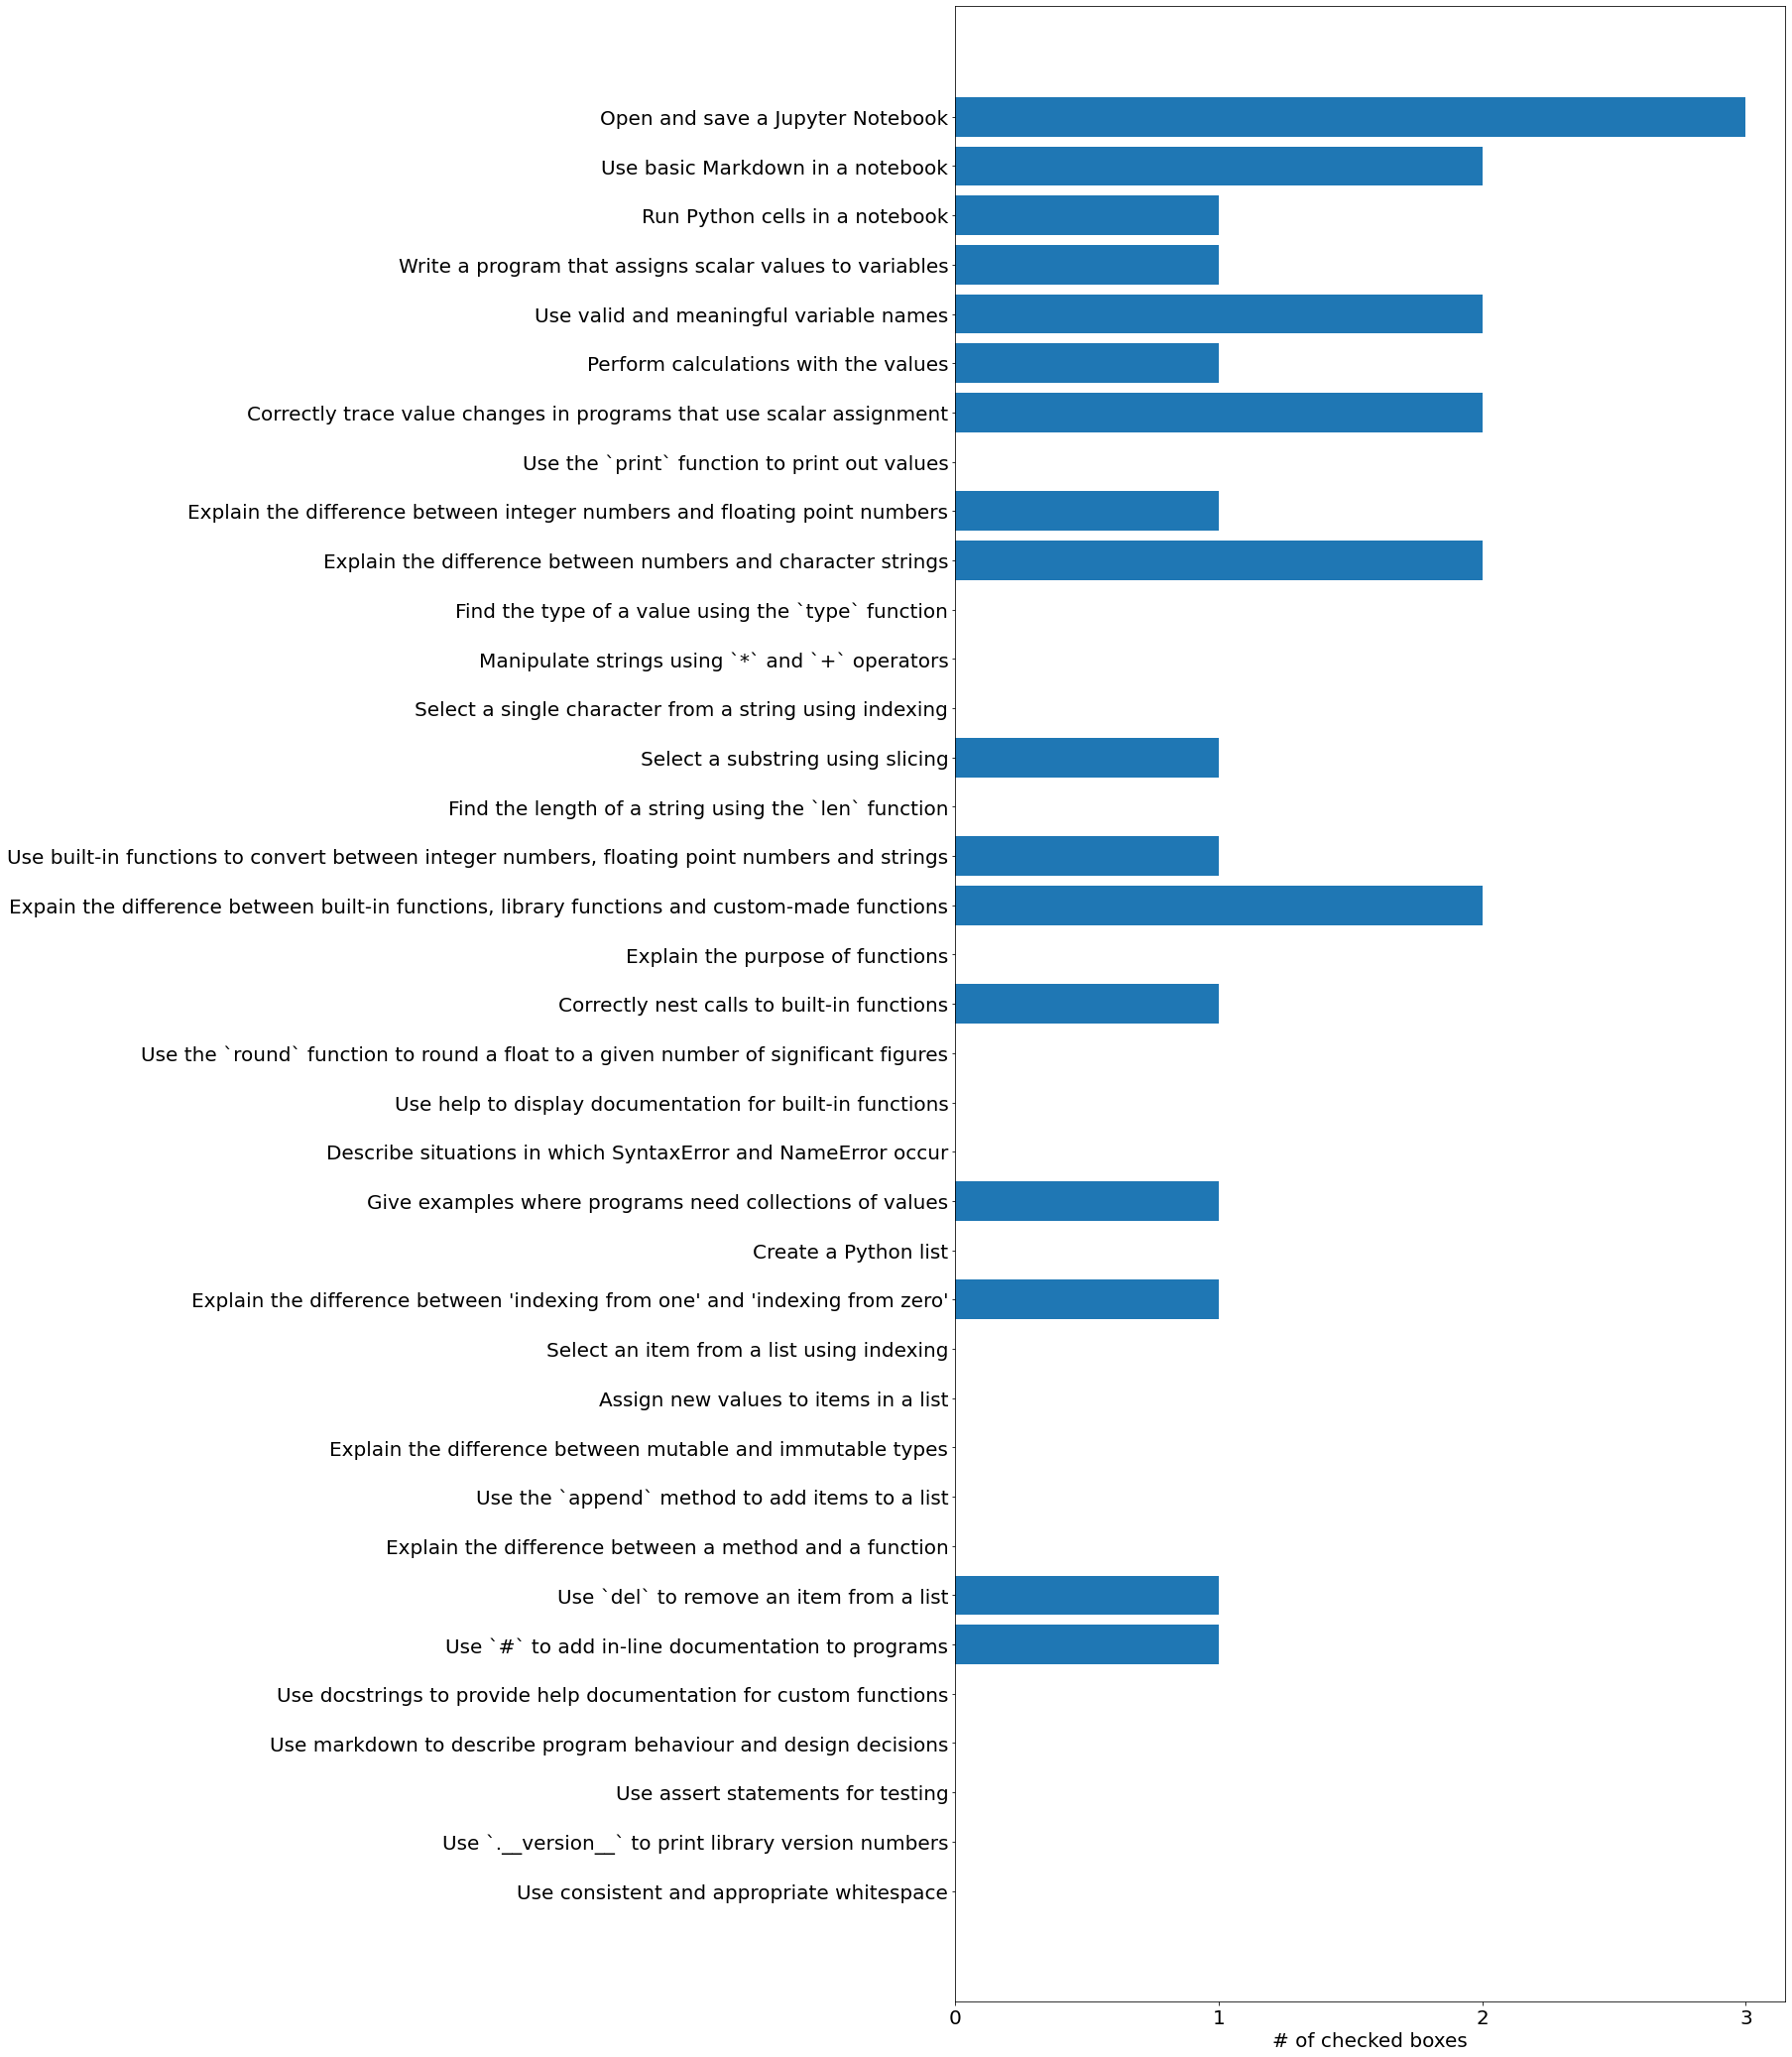

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15,len(tasks)))

ax.barh(np.arange(len(tasks)),totals, align='center')
ax.set_yticks(np.arange(len(tasks)))
ax.set_xticks(np.arange(max(totals)+0.1))
ax.set_yticklabels(tasks)
ax.invert_yaxis()
ax.set_xlabel('# of checked boxes')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.show()